In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'C:\Users\Priyanka Kala\Recommendation System\databases/cleaned_data.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [6]:
df.head(2)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [7]:
v=df['vote_count']
C=df['vote_average'].mean()
R=df['vote_average']

In [8]:
C

6.092171559442011

In [9]:
df['vote_count']

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

C:\Users\Priyanka Kala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_count'>

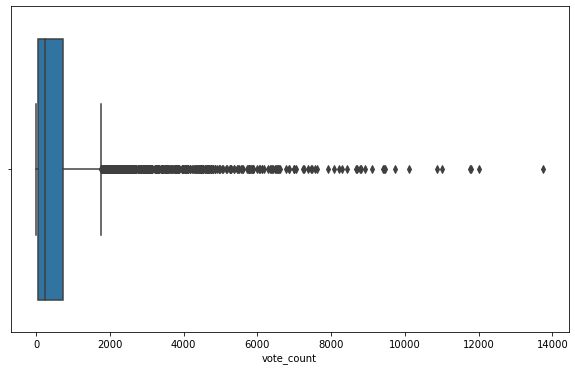

In [12]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(df['vote_count'])

In [13]:
threshold=df['vote_count'].quantile(0.9)

In [18]:
m=threshold

In [19]:
m

1838.4000000000015

In [20]:
data=df[df['vote_count']>=1838]

In [21]:
data.shape

(481, 19)

In [22]:
def avg_weighted(x,m=m,C=C):
    v=x['vote_count']
    R=x['vote_average']
    
    return ((R*v) + (C*m))/(v+m)
    

In [24]:
data['avg_weighted']=data.apply(avg_weighted,axis=1)

C:\Users\Priyanka Kala\AppData\Local\Temp\ipykernel_8196\2839003288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_weighted']=data.apply(avg_weighted,axis=1)


In [25]:
data.shape

(481, 20)

In [28]:
df_sorted=data.sort_values('avg_weighted',ascending=False)

In [29]:
df_sorted.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'avg_weighted'],
      dtype='object')

In [31]:
df_sorted[['original_title','vote_average', 'vote_count','avg_weighted','popularity']].head(10)

,original_title,vote_average,vote_count,avg_weighted,popularity
1881,The Shawshank Redemption,8.5,8205,8.059258,136.747729
662,Fight Club,8.3,9413,7.939256,146.757391
65,The Dark Knight,8.2,12002,7.920020,187.322927
3232,Pulp Fiction,8.3,8428,7.904645,121.463076
96,Inception,8.1,13752,7.863239,167.583710
3337,The Godfather,8.4,5893,7.851236,143.659698
95,Interstellar,8.1,10867,7.809479,724.247784
809,Forrest Gump,8.2,7927,7.803188,138.133331
329,The Lord of the Rings: The Return of the King,8.1,8064,7.727243,123.630332
1990,The Empire Strikes Back,8.2,5879,7.697884,78.517830


Text(0, 0.5, 'Movie title')

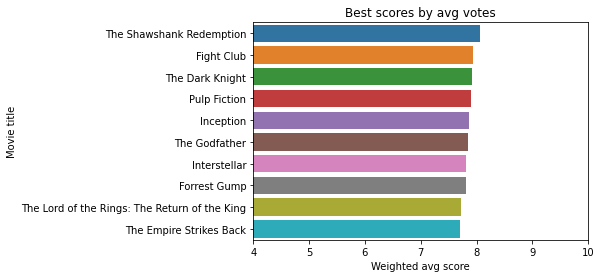

In [36]:
sns.barplot(x=df_sorted['avg_weighted'].head(10),y=df_sorted['original_title'].head(10),data=df_sorted)
plt.xlim(4,10)
plt.title('Best scores by avg votes')
plt.xlabel('Weighted avg score')
plt.ylabel('Movie title')

In [37]:
#POPULARITY BASED TECHNIQUE


In [38]:
data

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,avg_weighted
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,4291,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""name"": ""Lions Gate Films"", ""id"": 35}, {""nam...",2004-10-01,103911669,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Live or die. Make your choice.,7.2,2184,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de...",6.693677
4300,4300,1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",500,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""name"": ""Live Entertainment"", ""id"": 285}, {""...",1992-09-02,14661007,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Every dog has his day.,8.0,3697,"[{""cast_id"": 20, ""character"": ""Mr. White/Larry...","[{""credit_id"": ""52fe424ac3a36847f8012cb9"", ""de...",7.366378
4302,4302,1200000,"[{""id"": 37, ""name"":

In [39]:
data.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'avg_weighted'],
      dtype='object')

In [41]:
pop=data.sort_values('popularity',ascending=False)

In [42]:
pop.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'avg_weighted'],
      dtype='object')

In [44]:
p=pop[['original_title','popularity','vote_average','vote_count']]

Text(0, 0.5, 'Scores')

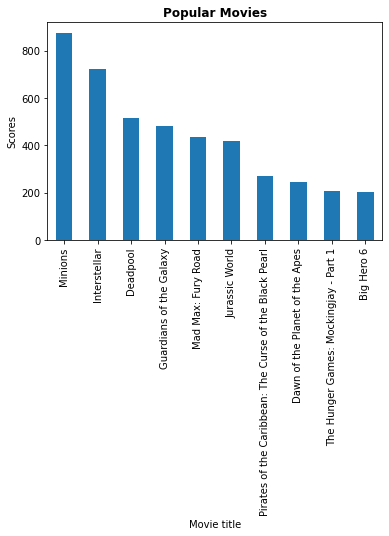

In [51]:
p.set_index('original_title')['popularity'].nlargest(10).plot(kind='bar')
plt.title('Popular Movies',weight='bold')
plt.xlabel('Movie title')
plt.ylabel('Scores')